**PACKAGES**

In [1]:
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,confusion_matrix,classification_report
import numpy as np
import os
import pandas as pd
from sklearn.utils import shuffle 
from tqdm import tqdm
import cv2
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt                                             
import tensorflow as tf
import PIL.ImageOps as ImageOps
import PIL.Image as Image
from tensorflow.keras import layers
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16, preprocess_input

**IMAGE PREPROCESSING**

In [2]:
class_names = ["fractured","not fractured"]
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}
nb_classes = len(class_names)
IMAGE_SIZE = (224,224)

In [3]:
def pre_process(img_path):
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, IMAGE_SIZE) 
    return image

In [4]:
# import numpy as np
# import os
# from keras.preprocessing import image
# from keras.applications.vgg16 import VGG16, preprocess_input
# from sklearn.preprocessing import LabelEncoder

# # Function to extract features from a list of images
# def extract_features(image_paths):
#     base_model = VGG16(weights='imagenet', include_top=False)
#     features = []
#     labels = []

#     for img_path in image_paths:
#         label = os.path.basename(os.path.dirname(img_path))
#         img = image.load_img(img_path, target_size=(224, 224))  # Resize image to VGG16 input size
#         x = image.img_to_array(img)
#         x = np.expand_dims(x, axis=0)
#         x = preprocess_input(x)
#         feature = base_model.predict(x)
#         features.append(feature.flatten())
#         labels.append(label)

#     encoder = LabelEncoder()
#     labels = encoder.fit_transform(labels)

#     return np.array(features), np.array(labels)

# # Example usage
# image_directory = 'path_to_your_image_directory'
# image_paths = []

# # Collect paths to all images in the directory
# for root, dirs, files in os.walk(image_directory):
#     for file in files:
#         if file.endswith('.jpg'):
#             image_paths.append(os.path.join(root, file))

# # Extract features from images
# features, labels = extract_features(image_paths)

# # Print the shape of the features and labels arrays
# print("Features shape:", features.shape)
# print("Labels shape:", labels.shape)


In [7]:
from keras.utils import load_img, img_to_array
def load_data():
    
    datasets = [r"C:\College\DATASET\BONE\train",r"C:\College\DATASET\BONE\test"]
    base_model = VGG16(weights='imagenet', include_top=False)
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        features = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image1 = pre_process(img_path) 
                x = img_to_array(image1)
                x = np.expand_dims(x, axis=0)
                x = preprocess_input(x)
                feature = base_model.predict(x)
                features.append(feature.flatten())

                # Append the image and its corresponding label to the output
                labels.append(label)
                

        output.append((np.array(features), np.array(labels)))

    return output

In [ ]:
(train_images, train_labels), (test_images, test_labels) = load_data()

In [6]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

In [7]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 7570
Number of testing examples: 1893
Each image is of size: (150, 150)


In [8]:
train_images = train_images / 255.0 
test_images = test_images / 255.0

In [9]:
def display_examples(class_names, images, labels):
    
    fig = plt.figure(figsize=(15,15))
    fig.suptitle("EXAMPLES OF IMAGES FROM THE DATASET", fontsize=16)
    for i in range(16):
        plt.subplot(4,4,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]],fontsize=10)
    plt.show()

In [10]:
def display_random_image(class_names, images, labels):
    
    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()

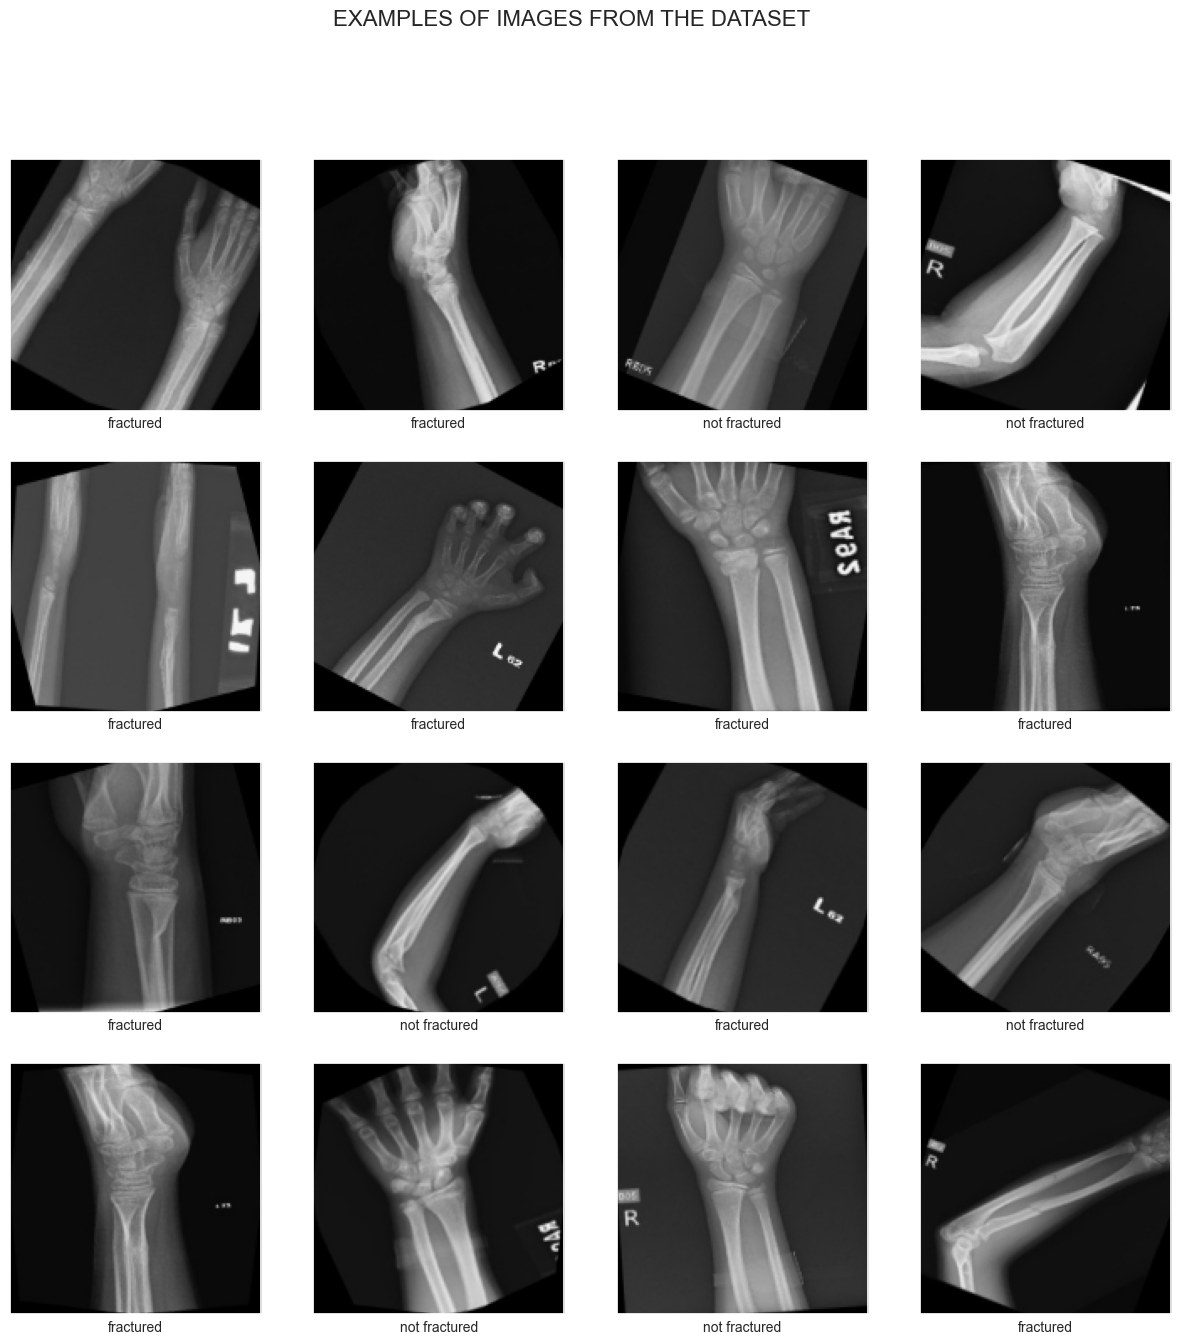

In [11]:
display_examples(class_names, train_images, train_labels)

In [12]:
train_images.shape

(7570, 150, 150, 3)

In [13]:
nsamples, nx, ny, nrgb = train_images.shape
images_train = train_images.reshape((nsamples,nx*ny*nrgb))
images_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [14]:
nsamples, nx, ny, nrgb = test_images.shape
images_test = test_images.reshape((nsamples,nx*ny*nrgb))
images_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [15]:
from sklearn.preprocessing import MaxAbsScaler
MaxAbsScaler = MaxAbsScaler()
image_train=MaxAbsScaler.fit_transform(images_train)
image_test=MaxAbsScaler.fit_transform(images_test)

In [16]:
image_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [17]:
image_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

**ML MODELS**

> **LOGISTIC REGRESSION**

In [20]:
from sklearn.linear_model import LogisticRegression
Logistic=LogisticRegression(C=10,penalty='l2',solver='newton-cg')
Logistic.fit(image_train, train_labels)

LogisticRegression(C=10, solver='newton-cg')

In [21]:
y_predl=Logistic.predict(image_test)
y_predl

array([0, 0, 0, ..., 1, 1, 1])

In [22]:
resultl=pd.DataFrame({"Actual":test_labels,"Predicted":y_predl})
resultl

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
1888,1,1
1889,1,1
1890,1,1
1891,1,1


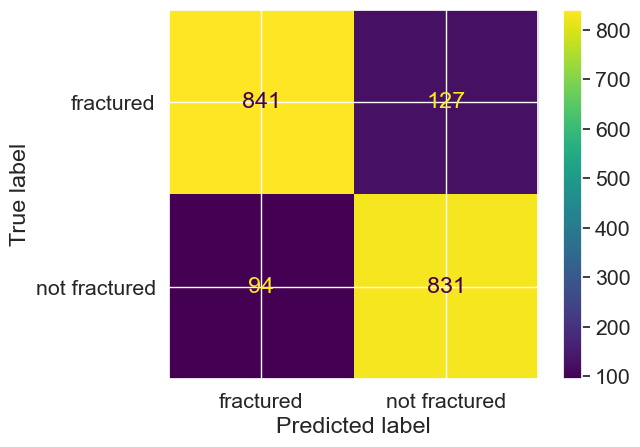

In [23]:
cml=confusion_matrix(test_labels,y_predl)
cdl=ConfusionMatrixDisplay(confusion_matrix=cml,display_labels=["fractured","not fractured"])
cdl.plot()

In [24]:
print(classification_report(test_labels,y_predl))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88       968
           1       0.87      0.90      0.88       925

    accuracy                           0.88      1893
   macro avg       0.88      0.88      0.88      1893
weighted avg       0.88      0.88      0.88      1893



> **RANDOM FOREST**

In [30]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100,class_weight='balanced_subsample',criterion='entropy',max_features='log2')
model.fit(image_train, train_labels)

RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_features='log2')

In [31]:
y_pred=model.predict(image_test)
y_pred

array([0, 0, 0, ..., 1, 1, 1])

In [32]:
result=pd.DataFrame({"Actual":test_labels,"Predicted":y_pred})
result

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
1888,1,1
1889,1,1
1890,1,1
1891,1,1


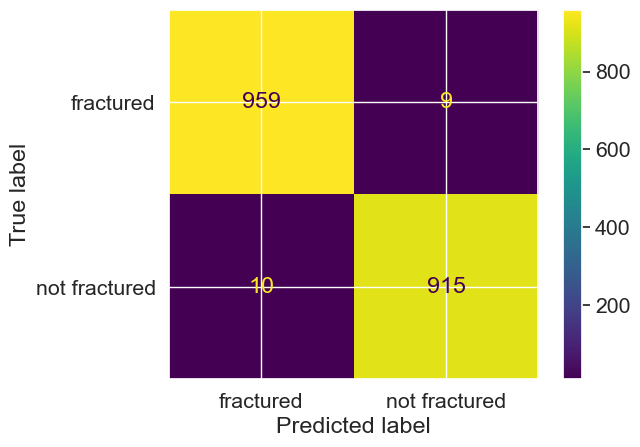

In [33]:
cm=confusion_matrix(test_labels,y_pred)
cd=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["fractured","not fractured"])
cd.plot()

In [34]:
print(classification_report(test_labels,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       968
           1       0.99      0.99      0.99       925

    accuracy                           0.99      1893
   macro avg       0.99      0.99      0.99      1893
weighted avg       0.99      0.99      0.99      1893



> **K-NEAREST NEIGHBORS**

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1,metric='manhattan',weights='uniform')
knn.fit(image_train, train_labels)

KNeighborsClassifier(metric='manhattan', n_neighbors=1)

In [26]:
y_pred1=knn.predict(image_test)
y_pred1

array([0, 0, 0, ..., 1, 1, 1])

In [27]:
result1=pd.DataFrame({"Actual":test_labels,"Predicted":y_pred1})
result1

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
1888,1,1
1889,1,1
1890,1,1
1891,1,1


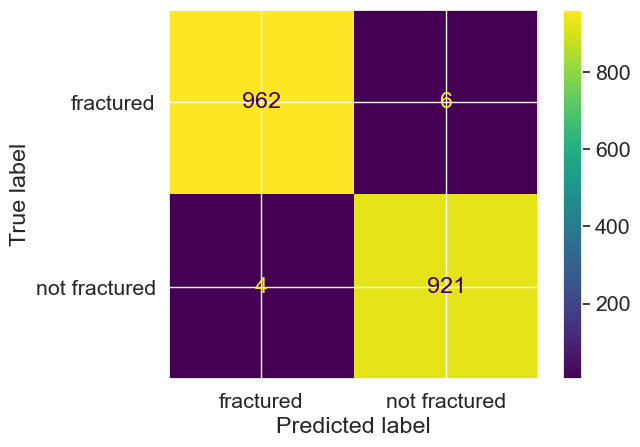

In [28]:
cm=confusion_matrix(test_labels,y_pred1)
cd=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["fractured","not fractured"])
cd.plot()

In [29]:
print(classification_report(test_labels,y_pred1))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       968
           1       0.99      1.00      0.99       925

    accuracy                           0.99      1893
   macro avg       0.99      0.99      0.99      1893
weighted avg       0.99      0.99      0.99      1893



> **DECISION TREE**

In [70]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(class_weight='balanced',criterion='gini',max_features='sqrt',splitter='random')
dtc.fit(image_train, train_labels)

DecisionTreeClassifier(class_weight='balanced', max_features='sqrt',
                       splitter='random')

In [71]:
y_pred_dtc=dtc.predict(image_test)
y_pred_dtc

array([0, 0, 1, ..., 1, 1, 1])

In [72]:
result1=pd.DataFrame({"Actual":test_labels,"Predicted":y_pred_dtc})
result1

,Actual,Predicted
0,0,0
1,0,0
2,0,1
3,0,0
4,0,0
...,...,...
1888,1,0
1889,1,1
1890,1,1
1891,1,1


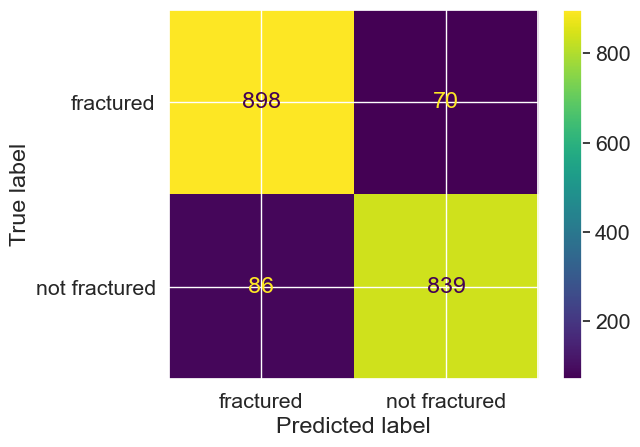

In [73]:
cm=confusion_matrix(test_labels,y_pred_dtc)
cd=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["fractured","not fractured"])
cd.plot()

In [74]:
print(classification_report(test_labels,y_pred_dtc))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       968
           1       0.92      0.91      0.91       925

    accuracy                           0.92      1893
   macro avg       0.92      0.92      0.92      1893
weighted avg       0.92      0.92      0.92      1893



> **GAUSSIANNB**

In [75]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB(var_smoothing=1.0)
nb.fit(image_train, train_labels)

GaussianNB(var_smoothing=1.0)

In [76]:
y_pred_nb=nb.predict(image_test)
y_pred_nb

array([1, 1, 0, ..., 0, 1, 1])

In [77]:
result2=pd.DataFrame({"Actual":test_labels,"Predicted":y_pred_nb})
result2

,Actual,Predicted
0,0,1
1,0,1
2,0,0
3,0,1
4,0,1
...,...,...
1888,1,0
1889,1,1
1890,1,0
1891,1,1


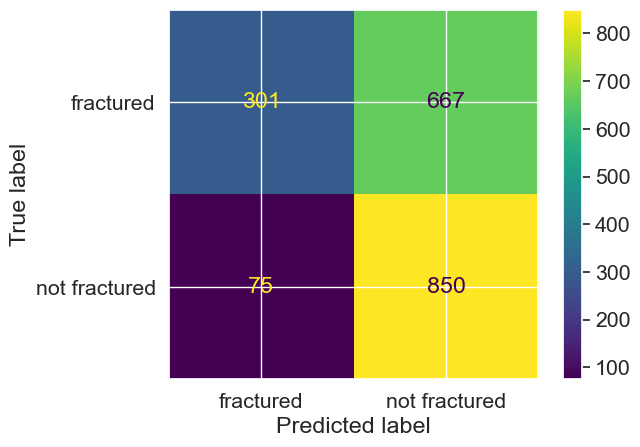

In [78]:
cm=confusion_matrix(test_labels,y_pred_nb)
cd=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["fractured","not fractured"])
cd.plot()

In [79]:
print(classification_report(test_labels,y_pred_nb))

              precision    recall  f1-score   support

           0       0.80      0.31      0.45       968
           1       0.56      0.92      0.70       925

    accuracy                           0.61      1893
   macro avg       0.68      0.61      0.57      1893
weighted avg       0.68      0.61      0.57      1893



> **SUPPORT VECTOR MACHINE**

In [102]:
classifier = SVC(C=50,class_weight='balanced',decision_function_shape='ovo',gamma='scale',kernel='poly')  
classifier.fit(image_train, train_labels)  

In [ ]:
y_pred_svc=classifier.predict(image_test)
y_pred_svc

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,

In [ ]:
result3=pd.DataFrame({"Actual":test_labels,"Predicted":y_pred_svc})
result3

,Actual,Predicted
0,0,0
1,0,0
2,0,1
3,0,0
4,0,0
...,...,...
595,1,1
596,1,1
597,1,1
598,1,1


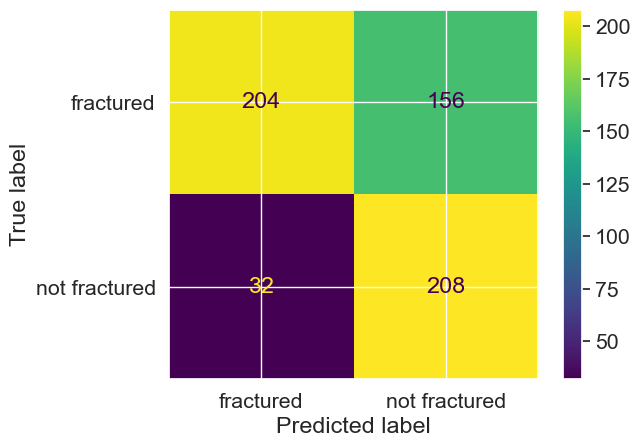

In [ ]:
cm=confusion_matrix(test_labels,y_pred_svc)
cd=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["fractured","not fractured"])
cd.plot()

In [ ]:
print(classification_report(test_labels,y_pred_svc))

              precision    recall  f1-score   support

           0       0.86      0.57      0.68       360
           1       0.57      0.87      0.69       240

    accuracy                           0.69       600
   macro avg       0.72      0.72      0.69       600
weighted avg       0.75      0.69      0.69       600



> **MULTINOMIALNB**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb_model = MultinomialNB()
mnb_model.fit(image_train, train_labels)

MultinomialNB()

In [ ]:
y_pred_mnb=classifier.predict(image_test)
y_pred_mnb

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,

In [ ]:
result4=pd.DataFrame({"Actual":test_labels,"Predicted":y_pred_mnb})
result4

,Actual,Predicted
0,0,0
1,0,0
2,0,1
3,0,0
4,0,0
...,...,...
595,1,1
596,1,1
597,1,1
598,1,1


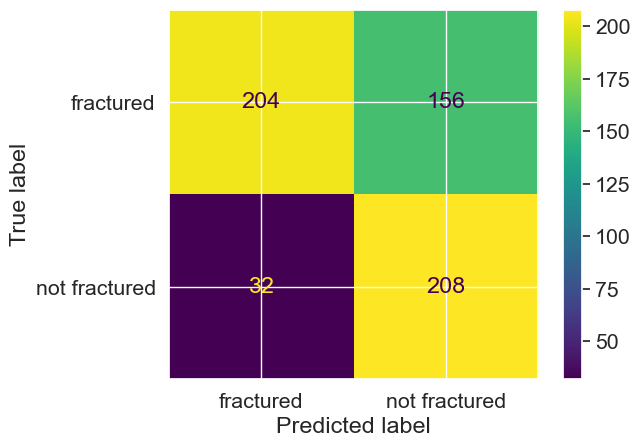

In [ ]:
cm4=confusion_matrix(test_labels,y_pred_mnb)
cd4=ConfusionMatrixDisplay(confusion_matrix=cm4,display_labels=["fractured","not fractured"])
cd4.plot()

In [ ]:
print(classification_report(test_labels,y_pred_mnb))

              precision    recall  f1-score   support

           0       0.86      0.57      0.68       360
           1       0.57      0.87      0.69       240

    accuracy                           0.69       600
   macro avg       0.72      0.72      0.69       600
weighted avg       0.75      0.69      0.69       600



> **MULTI-LAYER PERCEPTRON CLASSIFIER**

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier()
mlp_model.fit(image_train, train_labels)

MLPClassifier()

In [ ]:
y_pred_mlp=mlp_model.predict(image_test)
y_pred_mlp

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
result5=pd.DataFrame({"Actual":test_labels,"Predicted":y_pred_mlp})
result5

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
595,1,0
596,1,0
597,1,0
598,1,0


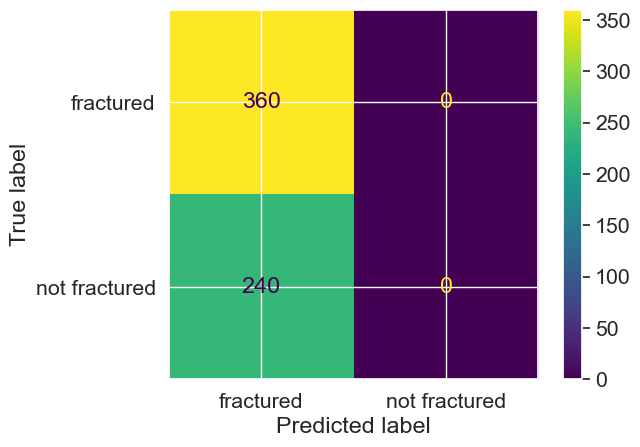

In [ ]:
cm5=confusion_matrix(test_labels,y_pred_mlp)
cd5=ConfusionMatrixDisplay(confusion_matrix=cm5,display_labels=["fractured","not fractured"])
cd5.plot()

In [ ]:
print(classification_report(test_labels,y_pred_mlp))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75       360
           1       0.00      0.00      0.00       240

    accuracy                           0.60       600
   macro avg       0.30      0.50      0.37       600
weighted avg       0.36      0.60      0.45       600



> **EXTRA TREES**

In [43]:
from sklearn.tree import ExtraTreeClassifier
extra = ExtraTreeClassifier(ccp_alpha= 0, class_weight= 'balanced', criterion= 'entropy', max_features= 'sqrt')
extra.fit(image_train, train_labels)

ExtraTreeClassifier(ccp_alpha=0, class_weight='balanced', criterion='entropy')

In [44]:
y_pred_extra=extra.predict(image_test)
y_pred_extra

array([0, 0, 0, ..., 1, 1, 1])

In [45]:
result8=pd.DataFrame({"Actual":test_labels,"Predicted":y_pred_extra})
result8

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
1888,1,1
1889,1,1
1890,1,1
1891,1,1


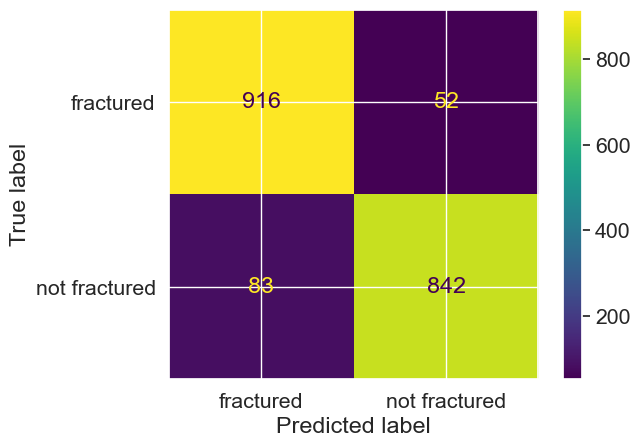

In [46]:
cm8=confusion_matrix(test_labels,y_pred_extra)
cd8=ConfusionMatrixDisplay(confusion_matrix=cm8,display_labels=["fractured","not fractured"])
cd8.plot()

In [47]:
print(classification_report(test_labels,y_pred_extra))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       968
           1       0.94      0.91      0.93       925

    accuracy                           0.93      1893
   macro avg       0.93      0.93      0.93      1893
weighted avg       0.93      0.93      0.93      1893



**DEEP LEARNING**

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(30, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=20, validation_split = 0.2)

Epoch 1/20
56/56 [==============================] - 38s 650ms/step - loss: 0.7023 - accuracy: 0.6416 - val_loss: 0.5505 - val_accuracy: 0.7270
Epoch 2/20
56/56 [==============================] - 33s 584ms/step - loss: 0.4705 - accuracy: 0.7772 - val_loss: 0.4071 - val_accuracy: 0.8285
Epoch 3/20
56/56 [==============================] - 32s 580ms/step - loss: 0.3106 - accuracy: 0.8752 - val_loss: 0.2567 - val_accuracy: 0.9007
Epoch 4/20
56/56 [==============================] - 32s 572ms/step - loss: 0.1880 - accuracy: 0.9347 - val_loss: 0.1948 - val_accuracy: 0.9363
Epoch 5/20
56/56 [==============================] - 32s 575ms/step - loss: 0.1077 - accuracy: 0.9664 - val_loss: 0.1240 - val_accuracy: 0.9622
Epoch 6/20
56/56 [==============================] - 34s 604ms/step - loss: 0.0652 - accuracy: 0.9795 - val_loss: 0.1197 - val_accuracy: 0.9667
Epoch 7/20
56/56 [==============================] - 33s 591ms/step - loss: 0.0378 - accuracy: 0.9894 - val_loss: 0.1271 - val_accuracy: 0.9673

In [ ]:
def plot_accuracy_loss(history):
    """
        We plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "accuracy")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_accuracy")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

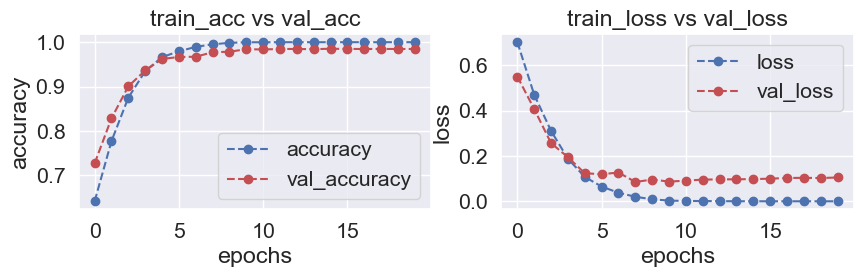

In [ ]:
plot_accuracy_loss(history)

In [ ]:
test_loss = model.evaluate(test_images, test_labels)

19/19 [==============================] - 1s 33ms/step - loss: 1.5686 - accuracy: 0.7633


19/19 [==============================] - 1s 31ms/step


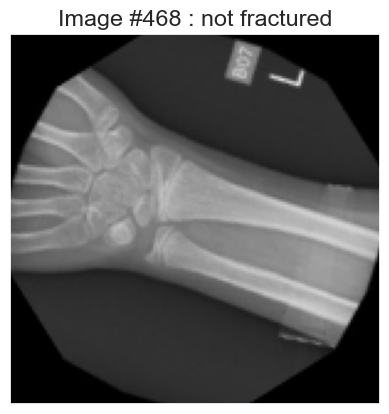

In [ ]:
predictions = model.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability

display_random_image(class_names, test_images, pred_labels)